In [1]:
import numpy as np
import os
import pandas as pd
import pickle as pkl
import scanpy as sc
import seaborn as sns

sc.settings.set_figure_params(dpi=100)

## Mapping INCOV to JAMA symptoms

In [2]:
# read in INCOV symptoms
# > rows are patient IDs, columns are symptoms
data = pd.read_csv('../../data/INCOV.PA.symptoms.CELL2023.csv', index_col=0)

In [3]:
# individual mappings
# > matched names were matched exactly to short names when possible
# > some JAMA symptoms had additional criteria, these were applied when possible
# > matched names were also identified through the list of symptoms in the RECOVER questionnaire
# > cases where names could not be mapped where marked with an NaN
INCOV_to_JAMA = {'abdominal_pain': 'Abdominal pain',
                 'anxiety': 'Anxiety',
                 'blurry_vision': 'Vision',
                 'cough': 'Chronic cough',
                 'depression': 'Depression',
                 'diarrhea': 'GI',
                 'difficulty_concentrating': 'Brain fog',
                 'difficulty_sleeping': 'Sleep disturbance',
                 'dizziness': 'Dizziness',
                 'fatigue': 'Fatigue',
                 'fever_or_chills': 'Fever/sweats/chills',
                 'hair_loss': 'Hair loss',
                 'headache': 'Headache',
                 'heart_palpitations': 'Palpitations',
                 'inability_to_exercise': 'P-E Malaise',
                 'joint_pain': 'Joint pain',
                 'loss_of_smell': 'Smell/taste',
                 'loss_of_taste': 'Smell/taste',
                 'memory_problems': 'Brain fog',
                 'muscle_body_aches': 'Muscle pain',
                 'nausea': np.nan,
                 'pain_feet_hands': 'Foot pain',
                 'persistent_chest_pain': 'Chest pain',
                 'shortness_of_breath': 'Shortness of breath',
                 'sputum': np.nan}
# save the mapping
if not os.path.exists('outputs'):
    os.mkdir('outputs')
with open('outputs/INCOV_to_JAMA.dict.pkl', 'wb') as f:
    pkl.dump(INCOV_to_JAMA, f)

## Checking overlap for INCOV symptoms that were mapped to the same JAMA symptom short name

<AxesSubplot:>

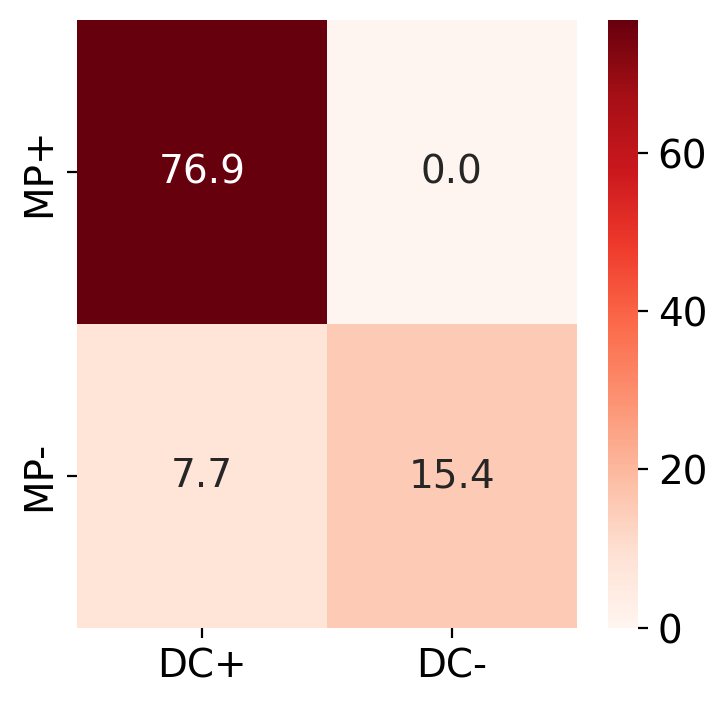

In [4]:
# create a dataframe to test the overlap of memory problems and difficulty concentrating
tmp = data[['memory_problems','difficulty_concentrating']].dropna()
plot = pd.DataFrame(index=['MP+','MP-'], columns=['DC+','DC-'])
# add in sums of intersections
plot.loc['MP+','DC+'] = sum((tmp['memory_problems'] == 1) & (tmp['difficulty_concentrating'] == 1))
plot.loc['MP-','DC+'] = sum((tmp['memory_problems'] == 0) & (tmp['difficulty_concentrating'] == 1))
plot.loc['MP+','DC-'] = sum((tmp['memory_problems'] == 1) & (tmp['difficulty_concentrating'] == 0))
plot.loc['MP-','DC-'] = sum((tmp['memory_problems'] == 0) & (tmp['difficulty_concentrating'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f')

<AxesSubplot:>

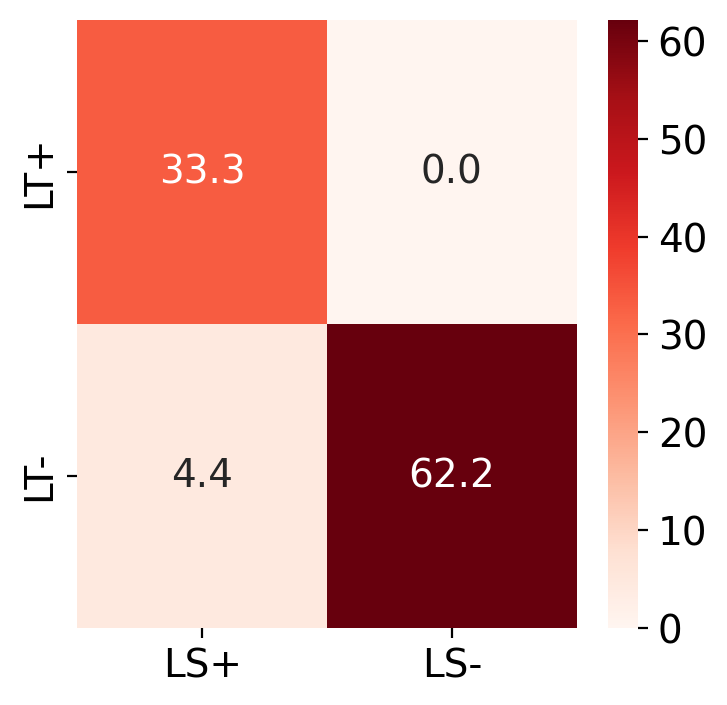

In [5]:
# create a dataframe to test the overlap of loss of taste and loss of smell
tmp = data[['loss_of_taste','loss_of_smell']].dropna()
plot = pd.DataFrame(index=['LT+','LT-'], columns=['LS+','LS-'])
# add in sums of intersections
plot.loc['LT+','LS+'] = sum((tmp['loss_of_taste'] == 1) & (tmp['loss_of_smell'] == 1))
plot.loc['LT-','LS+'] = sum((tmp['loss_of_taste'] == 0) & (tmp['loss_of_smell'] == 1))
plot.loc['LT+','LS-'] = sum((tmp['loss_of_taste'] == 1) & (tmp['loss_of_smell'] == 0))
plot.loc['LT-','LS-'] = sum((tmp['loss_of_taste'] == 0) & (tmp['loss_of_smell'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f')

## Mapping HAARVI to JAMA symptoms

In [6]:
# read in HAARVI symptoms
# > rows are patient IDs, columns are symptoms
data = pd.read_csv('../../data/HAARVI.PA.symptoms.CELL2023.csv', index_col=0)
# clean up the data so we are only looking at patients with at least one symptom for intersection purposes
data = data.dropna(how='all')
data.columns = data.columns.str.replace('FU_', '')

In [7]:
# individual mappings
# > same mapping policy was kept as done with INCOV
HAARVI_to_JAMA = {'Feeling_Feverish': 'Fever/sweats/chills',
                  'Cough': 'Chronic cough',
                  'Chills_or_Shivering': 'Fever/sweats/chills',
                  'Sweats': 'Fever/sweats/chills',
                  'Sore_throat_or_itchy_scratchy_throat': 'Throat pain',
                  'Nausea_or_vomiting': 'GI',
                  'Runny_or_stuffy_nose': np.nan,
                  'Muscle_or_body_aches': 'Muscle pain',
                  'Increased_Trouble_Breathing': 'Shortness of breath',
                  'Fatigue': 'Fatigue',
                  'Diarrhea': 'GI',
                  'Rash': 'Skin rash',
                  'Ear_Pain_or_ear_discharge': 'Hearing',
                  'Loss_of_sense_of_taste': 'Smell/taste',
                  'Loss_of_sense_smell': 'Smell/taste',
                  'Headache': 'Headache',
                  'Chest_pain': 'Chest pain',
                  'Joint_pain': 'Joint pain',
                  'Dry_eyes_and_mouth': 'Dry mouth',
                  'Vertigo': np.nan,}
# save the mapping
with open('outputs/HAARVI_to_JAMA.dict.pkl', 'wb') as f:
    pkl.dump(HAARVI_to_JAMA, f)

## Checking overlap for HAARVI symptoms that were mapped to the same JAMA symptom short name

<AxesSubplot:>

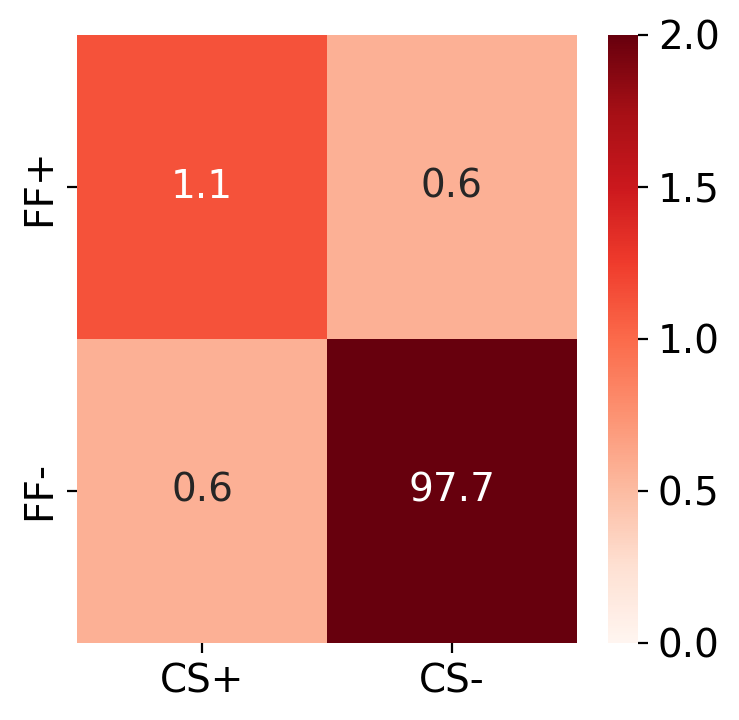

In [8]:
# create a dataframe to test the overlap of memory problems and difficulty concentrating
tmp = data[['Feeling_Feverish','Chills_or_Shivering']].dropna()
plot = pd.DataFrame(index=['FF+','FF-'], columns=['CS+','CS-'])
# add in sums of intersections
plot.loc['FF+','CS+'] = sum((tmp['Feeling_Feverish'] == 1) & (tmp['Chills_or_Shivering'] == 1))
plot.loc['FF-','CS+'] = sum((tmp['Feeling_Feverish'] == 0) & (tmp['Chills_or_Shivering'] == 1))
plot.loc['FF+','CS-'] = sum((tmp['Feeling_Feverish'] == 1) & (tmp['Chills_or_Shivering'] == 0))
plot.loc['FF-','CS-'] = sum((tmp['Feeling_Feverish'] == 0) & (tmp['Chills_or_Shivering'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f', vmin=0, vmax=2)

<AxesSubplot:>

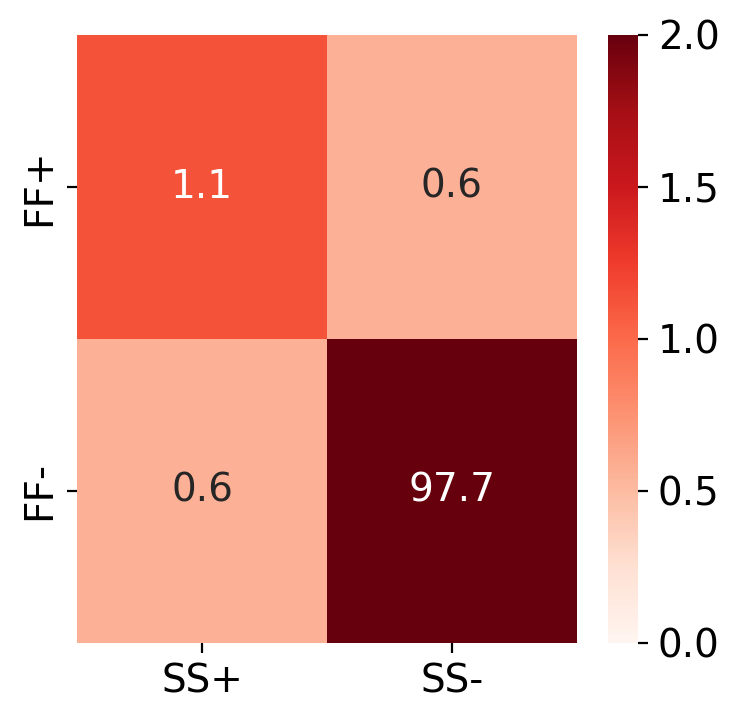

In [9]:
# create a dataframe to test the overlap of memory problems and difficulty concentrating
tmp = data[['Feeling_Feverish','Sweats']].dropna()
plot = pd.DataFrame(index=['FF+','FF-'], columns=['SS+','SS-'])
# add in sums of intersections
plot.loc['FF+','SS+'] = sum((tmp['Feeling_Feverish'] == 1) & (tmp['Sweats'] == 1))
plot.loc['FF-','SS+'] = sum((tmp['Feeling_Feverish'] == 0) & (tmp['Sweats'] == 1))
plot.loc['FF+','SS-'] = sum((tmp['Feeling_Feverish'] == 1) & (tmp['Sweats'] == 0))
plot.loc['FF-','SS-'] = sum((tmp['Feeling_Feverish'] == 0) & (tmp['Sweats'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f', vmin=0, vmax=2)

<AxesSubplot:>

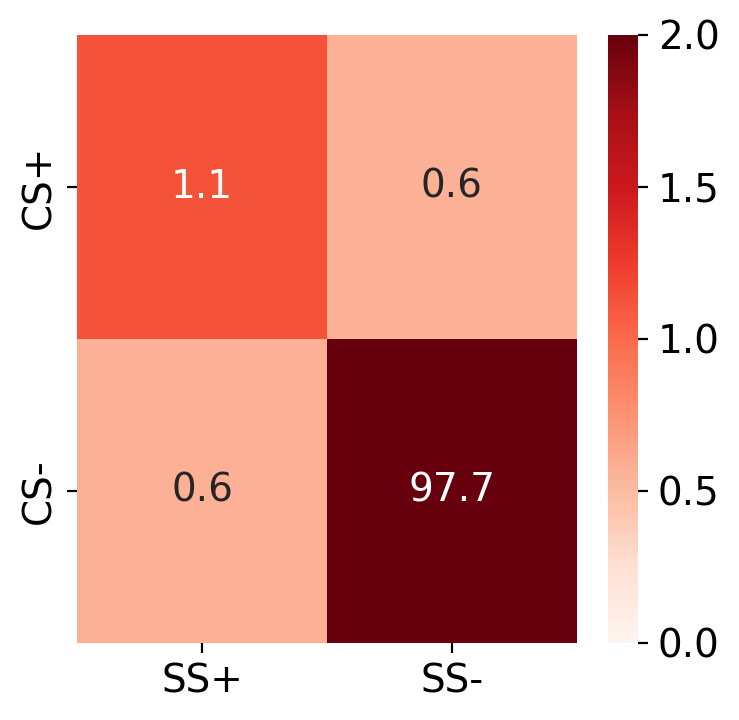

In [10]:
# create a dataframe to test the overlap of memory problems and diCSiculty concentrating
tmp = data[['Chills_or_Shivering','Sweats']].dropna()
plot = pd.DataFrame(index=['CS+','CS-'], columns=['SS+','SS-'])
# add in sums of intersections
plot.loc['CS+','SS+'] = sum((tmp['Chills_or_Shivering'] == 1) & (tmp['Sweats'] == 1))
plot.loc['CS-','SS+'] = sum((tmp['Chills_or_Shivering'] == 0) & (tmp['Sweats'] == 1))
plot.loc['CS+','SS-'] = sum((tmp['Chills_or_Shivering'] == 1) & (tmp['Sweats'] == 0))
plot.loc['CS-','SS-'] = sum((tmp['Chills_or_Shivering'] == 0) & (tmp['Sweats'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f', vmin=0, vmax=2)

<AxesSubplot:>

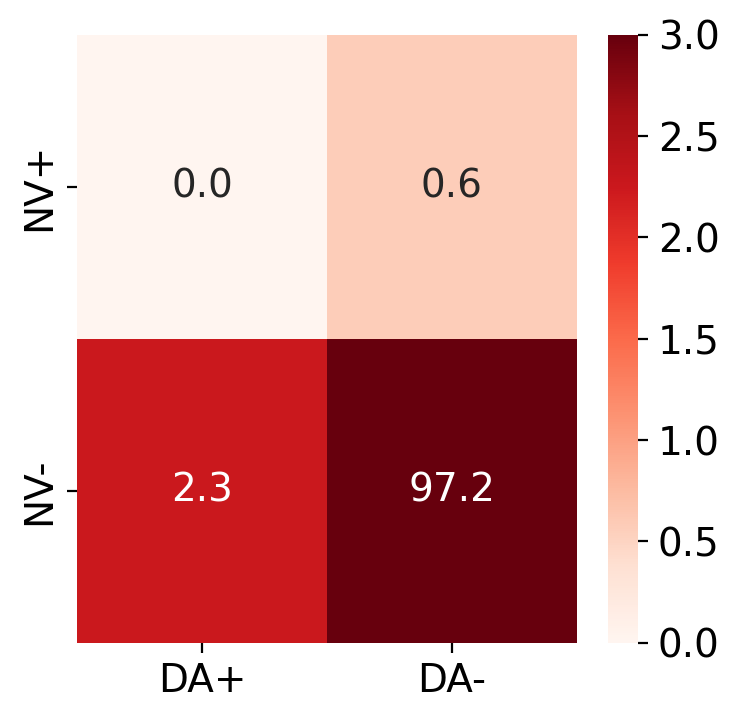

In [11]:
# create a dataframe to test the overlap of memory problems and diNViculty concentrating
tmp = data[['Nausea_or_vomiting','Diarrhea']].dropna()
plot = pd.DataFrame(index=['NV+','NV-'], columns=['DA+','DA-'])
# add in sums of intersections
plot.loc['NV+','DA+'] = sum((tmp['Nausea_or_vomiting'] == 1) & (tmp['Diarrhea'] == 1))
plot.loc['NV-','DA+'] = sum((tmp['Nausea_or_vomiting'] == 0) & (tmp['Diarrhea'] == 1))
plot.loc['NV+','DA-'] = sum((tmp['Nausea_or_vomiting'] == 1) & (tmp['Diarrhea'] == 0))
plot.loc['NV-','DA-'] = sum((tmp['Nausea_or_vomiting'] == 0) & (tmp['Diarrhea'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f', vmin=0, vmax=3)

<AxesSubplot:>

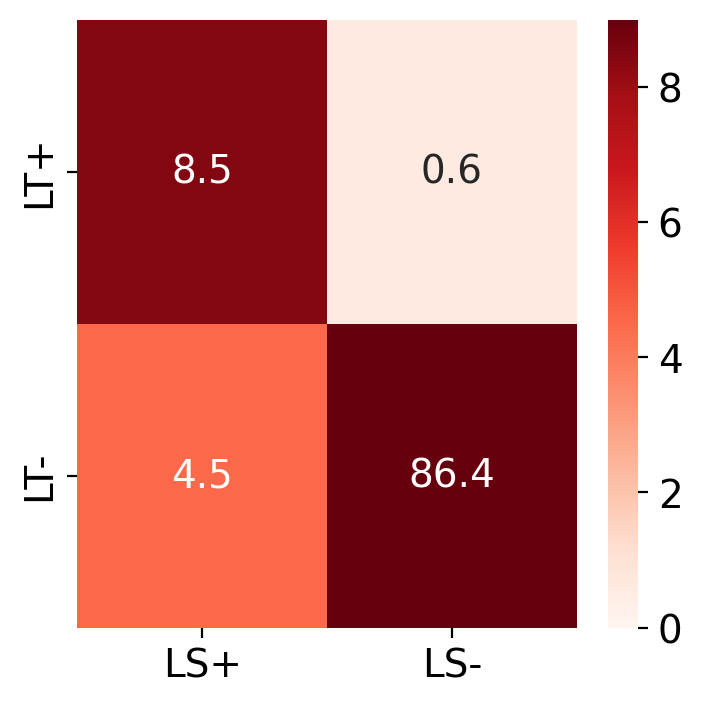

In [12]:
# create a LStaframe to test the overlap of memory problems and diLTiculty concentrating
tmp = data[['Loss_of_sense_of_taste','Loss_of_sense_smell']].dropna()
plot = pd.DataFrame(index=['LT+','LT-'], columns=['LS+','LS-'])
# add in sums of intersections
plot.loc['LT+','LS+'] = sum((tmp['Loss_of_sense_of_taste'] == 1) & (tmp['Loss_of_sense_smell'] == 1))
plot.loc['LT-','LS+'] = sum((tmp['Loss_of_sense_of_taste'] == 0) & (tmp['Loss_of_sense_smell'] == 1))
plot.loc['LT+','LS-'] = sum((tmp['Loss_of_sense_of_taste'] == 1) & (tmp['Loss_of_sense_smell'] == 0))
plot.loc['LT-','LS-'] = sum((tmp['Loss_of_sense_of_taste'] == 0) & (tmp['Loss_of_sense_smell'] == 0))
# normalize into percentages
plot /= plot.sum().sum()
plot *= 100
sns.heatmap(plot.astype(float), annot=True, cmap='Reds', fmt='.1f', vmin=0, vmax=9)

## Mapping HAARVI notes to JAMA symptoms

In [13]:
# read in HAARVI other symptoms
# > rows are patient IDs, columns is notes on other symptoms
data = pd.read_csv('../../data/HAARVI.PA.symptoms_other.CELL2023.csv', index_col=0)

In [14]:
# individual mappings
# > same mapping policy was kept as done with INCOV and HAARVI
# > each written note was evaluated for JAMA listed in symptoms
# > mapping is of patient ID to additional symptoms as gathered from these notes
HAARVI_ID_to_JAMA = {'22C': ['P-E Malaise'],
                     '52C': ['Abdominal pain','Throat pain','Dizziness'],
                     '57C': ['Hair loss','Numbness/tingling','Smell/taste','Fever/sweats/chills'],
                     '65C': ['Brain fog'],
                     '66C': ['Smell/taste'],
                     '108C': ['Hair loss'],
                     '116C': ['Abdominal pain'],
                     '119C': ['Smell/taste','Brain fog','Shortness of breath'],
                     '122C': ['Skin color changes'],
                     '143C': ['Depression','Anxiety','Weakness','Fatigue'],
                     '171C': ['Hair loss','Tremor'],
                     '181C': ['Hair loss'],
                     '199C': ['Brain fog'],
                     '2C': ['Numbness/tingling'],
                     '113C': ['Fatigue','Fever/sweats/chills','Sleep disturbance'],}
# save the mapping
with open('outputs/HAARVI_ID_to_JAMA.dict.pkl', 'wb') as f:
    pkl.dump(HAARVI_ID_to_JAMA, f)